In [109]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [110]:
def poisson_IG(N,dt,ustar,vstar):
    
    f = 1/dt*( (ustar[1:,:-1]-ustar[:-1,:-1])/dh + (vstar[:-1,1:]-vstar[:-1,:-1])/dh )
    
    #p_i = numpy.zeros((N,N))    #initial guess
    
    l2_target = 1e-8
    omega = 2/(1+(numpy.pi/N))
    return f,l2_target,omega

def poisson_SOR(p,pn,l2_target,omega,f,dh):
    iterations = 0
    iter_diff = l2_target + 1
    denominator = 0.0
    ny,nx=p.shape
    l2_diff = numpy.zeros(20000)
    
    while iter_diff > l2_target:
        for j in range(N):
            for i in range(N):
                pn[j,i]=p[j,i]
                
        iter_diff = 0.0
        denominator = 0.0
        
        for j in range(1,N-1):
            for i in range(1,N-1):
                p[j,i] = (1-omega)*p[j,i] + omega * ((p[j,i+1]+p[j,i-1])*dh**2 +\
                    (p[j+1,i] + p[j-1,i])*dh**2 -f[j,i]*dh**2*dh**2)/(2*(dh**2 + dh**2))
                
        #enforce neumann bc on boundaries
        for j in range(N):
            p[j,0] = p[j,1]    #left boundary
            p[j,-1] = p[j,-2]    #right boundary
        for i in range(N):
            p[0,i] = p[1,i]    #bottom boundary
            p[-1,i] = p[-2,i]    #top boundary
        
        #corners, set equal to one of the sides
        p[0,0]=p[0,1]    #bottom left corner
        p[0,-1]=p[0,-2]    #bottom right corner
        p[-1,-1]=p[-2,-1]    #top right corner
        p[-1,0]=p[-2,0]    #top left corner
        

        #p[:,-1] = p[:,0]
        #p[-1,:] = p[0,:]
            
        for j in range(N):
            for i in range(N):
                iter_diff += (p[j,i]-pn[j,i])**2
                denominator += (pn[j,i]*pn[j,i])
                
        iter_diff /= denominator
        iter_diff = iter_diff**0.5
        l2_diff[iterations] = iter_diff
        iterations +=1
        
    print("SOR method took {} iterations at tolerance {} with omega = {} and nx = {}".format(iterations, l2_target, omega,N))

        
    return p,iterations,l2_diff

In [115]:
N = 20
nt=10
t = numpy.linspace(0,2,nt)
x = numpy.linspace(0,2*numpy.pi,N)
y = numpy.linspace(0,2*numpy.pi,N)
X,Y = numpy.meshgrid(x,y)
nu = 1

dh = 2*numpy.pi/(N-1)
Xu,Yu = X,Y+0.5*dh    #u grid
Xv,Yv = X+0.5*dh,Y    #v grid


# pressure grid and ghost points
Xpl = numpy.ones((N+1,N+1))
Ypl = numpy.ones((N+1,N+1))
Xpl[1:,1:] = X+0.5*dh
Xpl[:,0] = -0.5*dh
Xpl[0,:] = Xpl[1,:]
Ypl[1:, 1:] = Y+0.5*dh
Ypl[0,:] = -0.5*dh
Ypl[:,0]=Ypl[:,1]


p_i = -1/4*(numpy.cos(2*Xpl)+numpy.cos(2*Ypl))
u_exactf = -numpy.exp(-2*0)*numpy.cos(Xu)*numpy.sin(Yu)
v_exactf = numpy.exp(-2*0)*numpy.sin(Xv)*numpy.cos(Yv)
p_exactf = -numpy.exp(-4*0)/4*(numpy.cos(2*Xpl[1:,1:])+numpy.cos(2*Ypl[1:,1:]))

CFL = 0.3 # 0.4 or 0.3 or 2.51
sigma = 0.62
maxu,maxv = numpy.max(numpy.absolute(u_exactf)/dh), numpy.max(numpy.absolute(v_exactf)/dh)
maxim = max(maxu,maxv)

dtc = CFL/maxim
dtv = sigma/nu*dh**2   #stability condition

dt = 0.05 #min(dtc,dtv)
print(dt)

0.05


In [116]:
f,l2_target,omega = poisson_IG(N,dt,u_exactf,v_exactf)
p,iterations,l2_diff = poisson_SOR(p_i.copy(),p_i.copy(),l2_target,omega,f,dh)

SOR method took 365 iterations at tolerance 1e-08 with omega = 1.7284895036727337 and nx = 20


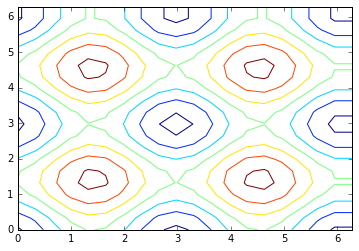

In [119]:
pyplot.contour(X,Y,p_i[1:,1:])

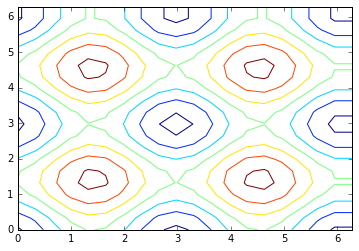

In [102]:
pyplot.contour(X,Y,p_exactf)